#  Portfolio with the Maximum Sharpe Ratio for the Consumer Durables Sector

In [4]:
import random
random.seed(3)

In [5]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
start = dt.datetime(2017,1,1).date()
end = dt.datetime(2021,1,1).date()

tickers=['TITAN.NS', 'HAVELLS.NS', 'VOLTAS.NS', 'CROMPTON.NS','BATAINDIA.NS', 'KAJARIACER.NS', 'RAJESHEXPO.NS', 
          'RELAXO.NS', 'BLUESTARCO.NS']

DF =pd.DataFrame()

for i in tickers:
    df = yf.download(i,start,end)[['Adj Close']].pct_change()
    df.columns = [i]                         
    DF = pd.concat([DF,df],axis =1)

df = DF.copy().round(5)
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


TITAN.NS  HAVELLS.NS  VOLTAS.NS  CROMPTON.NS  BATAINDIA.NS  \
Date                                                                     
2017-01-02       NaN         NaN        NaN          NaN           NaN   
2017-01-03   0.04252     0.00293    0.01309      0.04526       0.03578   
2017-01-04   0.03303     0.02421    0.00932     -0.02373       0.00043   
2017-01-05  -0.00445     0.02392    0.02576     -0.02628       0.01522   
2017-01-06  -0.00796     0.00348   -0.02323      0.00439       0.00393   
...              ...         ...        ...          ...           ...   
2020-12-24   0.00339     0.00285   -0.01260      0.01035      -0.00991   
2020-12-28   0.03185     0.00859    0.00623      0.00168       0.02669   
2020-12-29  -0.00224     0.00570   -0.00202      0.03418      -0.01572   
2020-12-30   0.00812    -0.00451    0.00669     -0.00217      -0.00208   
2020-12-31   0.00937     0.01271    0.00714      0.03312      -0.00092   

            KAJARIACER.NS  RAJESHEXPO.NS  RELAXO.NS  BLUESTARCO.NS  
Date                                                                
2017-01-02            NaN            NaN        NaN            NaN  
2017-01-03        0.00564        0.02209   -0.01517        0.01702  
2017-01-04       -0.01030        0.02204    0.00363        0.00071  
2017-01-05        0.01844        0.04230    0.00362        0.00377  
2017-01-06       -0.00435       -0.00561   -0.00261       -0.00020  
...                   ...            ...        ...            ...  
2020-12-24       -0.01627       -0.00041    0.02764        0.00051  
2020-12-28       -0.00247        0.00072    0.00186       -0.01344  
2020-12-29        0.00371       -0.00287   -0.00862        0.01767  
2020-12-30       -0.00058        0.00123    0.00213        0.01193  
2020-12-31        0.02023        0.00770    0.01048       -0.00056  

[988 rows x 9 columns]

In [6]:
mean_returns = df.mean() 
cov_matrix = df.cov()




print(mean_returns)
print(cov_matrix)

TITAN.NS         0.001834
HAVELLS.NS       0.001222
VOLTAS.NS        0.001183
CROMPTON.NS      0.001198
BATAINDIA.NS     0.001495
KAJARIACER.NS    0.000613
RAJESHEXPO.NS    0.000211
RELAXO.NS        0.001581
BLUESTARCO.NS    0.000770
dtype: float64
               TITAN.NS  HAVELLS.NS  VOLTAS.NS  CROMPTON.NS  BATAINDIA.NS  \
TITAN.NS       0.000487    0.000158   0.000156     0.000090      0.000169   
HAVELLS.NS     0.000158    0.000376   0.000186     0.000102      0.000131   
VOLTAS.NS      0.000156    0.000186   0.000403     0.000112      0.000151   
CROMPTON.NS    0.000090    0.000102   0.000112     0.000430      0.000089   
BATAINDIA.NS   0.000169    0.000131   0.000151     0.000089      0.000360   
KAJARIACER.NS  0.000127    0.000141   0.000136     0.000121      0.000130   
RAJESHEXPO.NS  0.000035    0.000032   0.000054     0.000040      0.000043   
RELAXO.NS      0.000091    0.000092   0.000093     0.000064      0.000103   
BLUESTARCO.NS  0.000111    0.000111   0.000144     0.00009

In [7]:
num_runs = 10000 # number of rows/iterations
result = np.zeros((num_runs,(len(tickers)+3)))
result

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
for i in range(num_runs):
    
    # randomized weights
    weights = np.array(np.random.random(len(tickers))) 
    #Rebalance w/ constraints (SUM of all weights CANNOT BE > 1)
    weights = weights/np.sum(weights)
    
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_return = portfolio_return * 252
    
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights)))
    portfolio_std_dev = portfolio_std_dev * np.sqrt(252)
    
    Sharpe = portfolio_return /  portfolio_std_dev
    
    # Populating the 'result' array with the required values: Mean, SD, Sharpe followed by the weights                   
    result[i,0] =  portfolio_return
    result[i,1] = portfolio_std_dev
    result[i,2] = Sharpe
    
    for j in range(len(tickers)):
        result[i,j+3]= weights[j]

In [9]:
result

array([[0.28878648, 0.18229856, 1.58414022, ..., 0.13997841, 0.14473362,
        0.09151284],
       [0.27660517, 0.17965803, 1.53962038, ..., 0.14600159, 0.10668744,
        0.12663632],
       [0.27846444, 0.19102705, 1.45772257, ..., 0.12250081, 0.19849415,
        0.17673928],
       ...,
       [0.28336504, 0.20437434, 1.38650012, ..., 0.03692257, 0.01510964,
        0.0670834 ],
       [0.28776291, 0.1845307 , 1.55943109, ..., 0.12558708, 0.14413996,
        0.16453249],
       [0.27549829, 0.20264609, 1.35950461, ..., 0.05470988, 0.01626047,
        0.21689357]])

In [10]:
# Converting 'result' into a DataFrame
columns = ['mean','sd','Sharpe'] + tickers
columns

['mean',
 'sd',
 'Sharpe',
 'TITAN.NS',
 'HAVELLS.NS',
 'VOLTAS.NS',
 'CROMPTON.NS',
 'BATAINDIA.NS',
 'KAJARIACER.NS',
 'RAJESHEXPO.NS',
 'RELAXO.NS',
 'BLUESTARCO.NS']

In [11]:
result = pd.DataFrame(result,columns=columns)
result

mean        sd    Sharpe  TITAN.NS  HAVELLS.NS  VOLTAS.NS  \
0     0.288786  0.182299  1.584140  0.154808    0.156588   0.097162   
1     0.276605  0.179658  1.539620  0.134329    0.110503   0.066724   
2     0.278464  0.191027  1.457723  0.177030    0.001187   0.163149   
3     0.262267  0.180325  1.454417  0.071267    0.053421   0.016755   
4     0.299262  0.191887  1.559577  0.140214    0.006613   0.089646   
...        ...       ...       ...       ...         ...        ...   
9995  0.254733  0.195875  1.300485  0.061683    0.003315   0.121160   
9996  0.258931  0.182220  1.420983  0.085974    0.032934   0.077310   
9997  0.283365  0.204374  1.386500  0.150626    0.091978   0.166783   
9998  0.287763  0.184531  1.559431  0.154775    0.011433   0.136480   
9999  0.275498  0.202646  1.359505  0.139430    0.193081   0.045635   

      CROMPTON.NS  BATAINDIA.NS  KAJARIACER.NS  RAJESHEXPO.NS  RELAXO.NS  \
0        0.159289      0.002089       0.053840       0.139978   0.144734   
1        0.169993      0.058298       0.080828       0.146002   0.106687   
2        0.002206      0.011564       0.147130       0.122501   0.198494   
3        0.157813      0.237471       0.127511       0.235046   0.093204   
4        0.160041      0.156211       0.160835       0.047850   0.121556   
...           ...           ...            ...            ...        ...   
9995     0.097593      0.143355       0.175525       0.075449   0.058880   
9996     0.143233      0.001269       0.171909       0.125488   0.190111   
9997     0.167879      0.076938       0.226680       0.036923   0.015110   
9998     0.070439      0.112363       0.080251       0.125587   0.144140   
9999     0.023115      0.141853       0.169023       0.054710   0.016260   

      BLUESTARCO.NS  
0          0.091513  
1          0.126636  
2          0.176739  
3          0.007513  
4          0.117034  
...             ...  
9995       0.263040  
9996       0.171772  
9997       0.067083  
9998       0.164532  
9999       0.216894  

[10000 rows x 12 columns]

In [12]:
Max_Sharpe = result.iloc[result['Sharpe'].idxmax()]
print(Max_Sharpe)

mean             0.355043
sd               0.197476
Sharpe           1.797911
TITAN.NS         0.212967
HAVELLS.NS       0.011561
VOLTAS.NS        0.023243
CROMPTON.NS      0.213720
BATAINDIA.NS     0.216484
KAJARIACER.NS    0.011627
RAJESHEXPO.NS    0.042438
RELAXO.NS        0.215293
BLUESTARCO.NS    0.052667
Name: 8223, dtype: float64


In [13]:
Min_SD = result.iloc[result['sd'].idxmin()]
print(Min_SD)

mean             0.264864
sd               0.172589
Sharpe           1.534657
TITAN.NS         0.061191
HAVELLS.NS       0.134051
VOLTAS.NS        0.066755
CROMPTON.NS      0.077820
BATAINDIA.NS     0.088023
KAJARIACER.NS    0.032353
RAJESHEXPO.NS    0.230534
RELAXO.NS        0.203073
BLUESTARCO.NS    0.106201
Name: 4149, dtype: float64


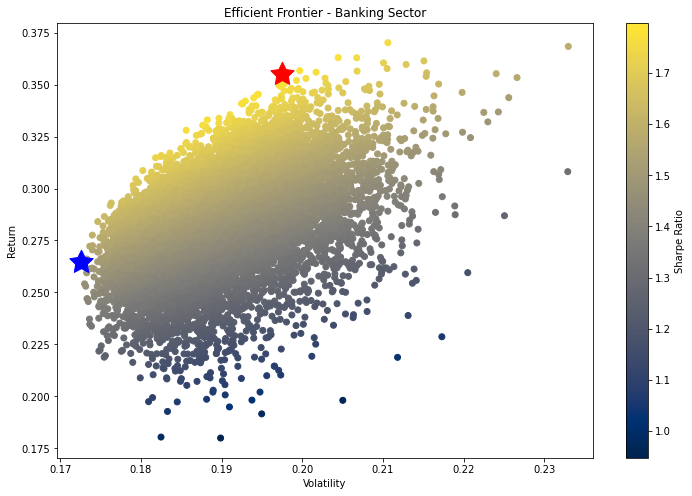

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))
plt.scatter(x=result['sd'],y=result['mean'],c=result['Sharpe'],cmap='cividis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.title('Efficient Frontier - Banking Sector')
#Plot a red star to highlight position of the portfolio with highest Sharpe Ratio
plt.scatter(Max_Sharpe[1],Max_Sharpe[0],marker=(5,1,0),color='r',s=600)

#Plot a blue star to highlight position of the portfolio with minimum Variance
plt.scatter(Min_SD[1],Min_SD[0],marker=(5,1,0),color='b',s=600)
plt.show()